<a href="https://colab.research.google.com/github/anu-mohan/Ds_pythoncode/blob/main/Naive_Bayes_Anisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1) Prepare a classification model using Naive Bayes for salary data

Data Description:

age -- age of a person workclass -- A work class is a grouping of work education -- Education of an individuals
maritalstatus -- Marital status of an individulas
occupation -- occupation of an individuals relationship --
race -- Race of an Individual sex -- Gender of an Individual capitalgain -- profit received from the sale of an investment
capitalloss -- A decrease in the value of a capital asset hoursperweek -- number of hours work per week
native -- Native of an individual Salary -- salary of an individual

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
salary_train=pd.read_csv('/content/SalaryData_Train.csv')

In [3]:
salary_test=pd.read_csv('/content/SalaryData_Test.csv')

In [4]:
salary_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [6]:
salary_train.shape

(30161, 14)

In [7]:
salary_test.shape

(15060, 14)

In [8]:
salary_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [9]:
salary_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [10]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [11]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

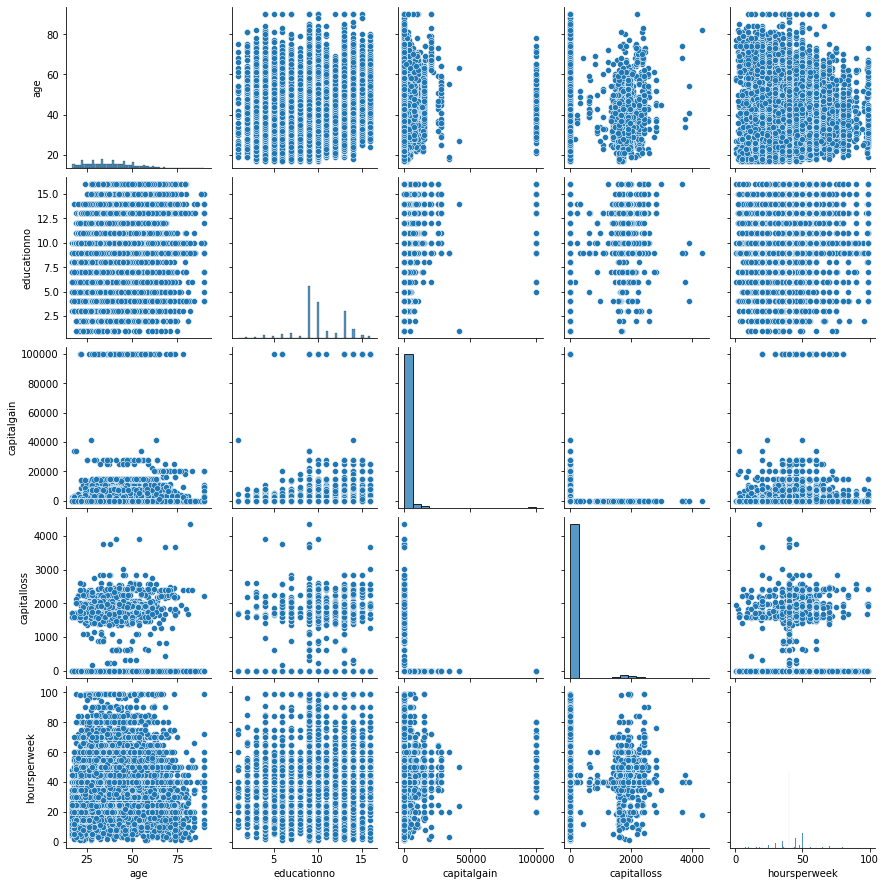

In [13]:
sns.pairplot(salary_train)

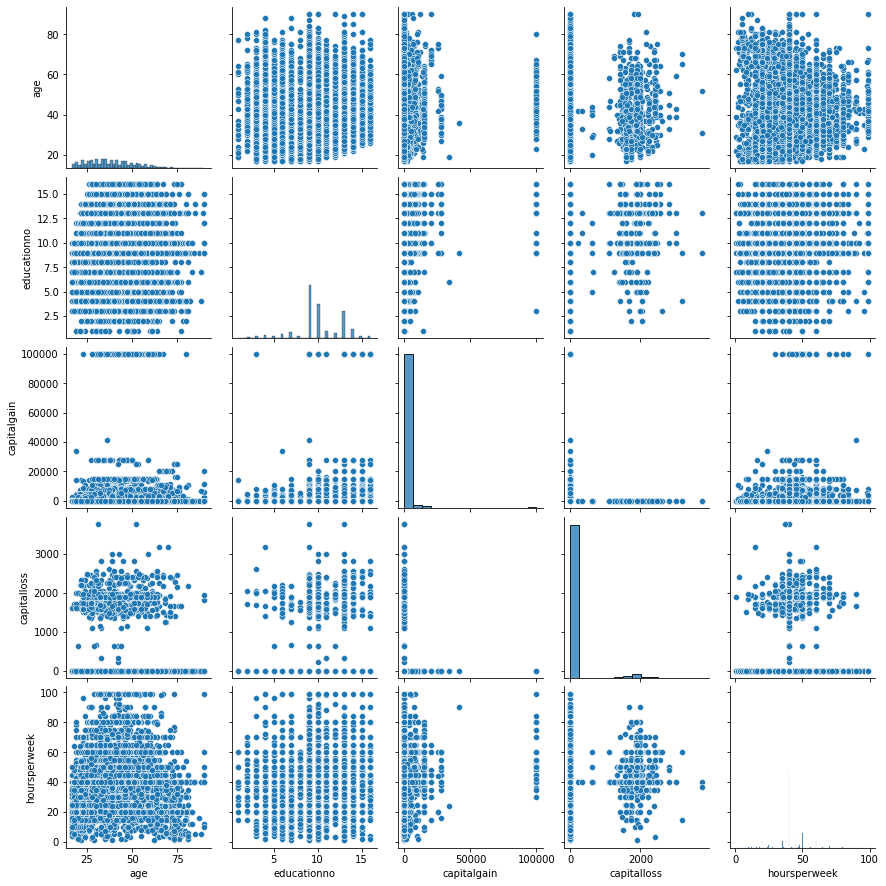

In [14]:
sns.pairplot(salary_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


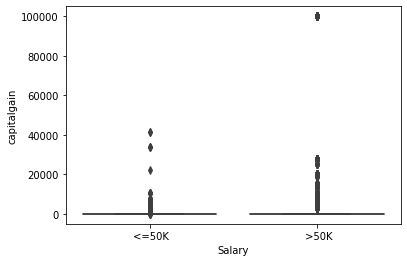

In [15]:
sns.boxplot(salary_train['Salary'], salary_train['capitalgain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


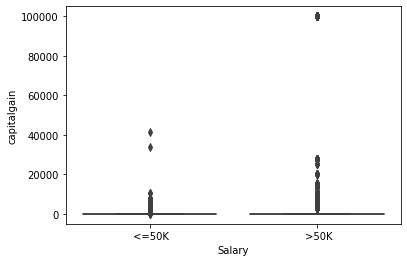

In [16]:
sns.boxplot(salary_test['Salary'], salary_test['capitalgain'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


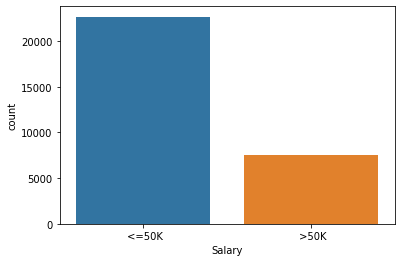

In [17]:
sns.countplot(salary_train['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


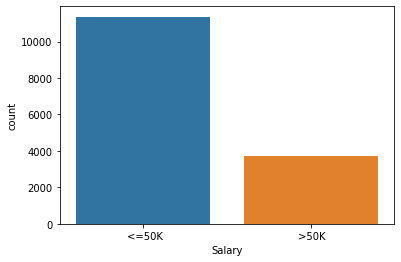

In [18]:
sns.countplot(salary_test['Salary'])

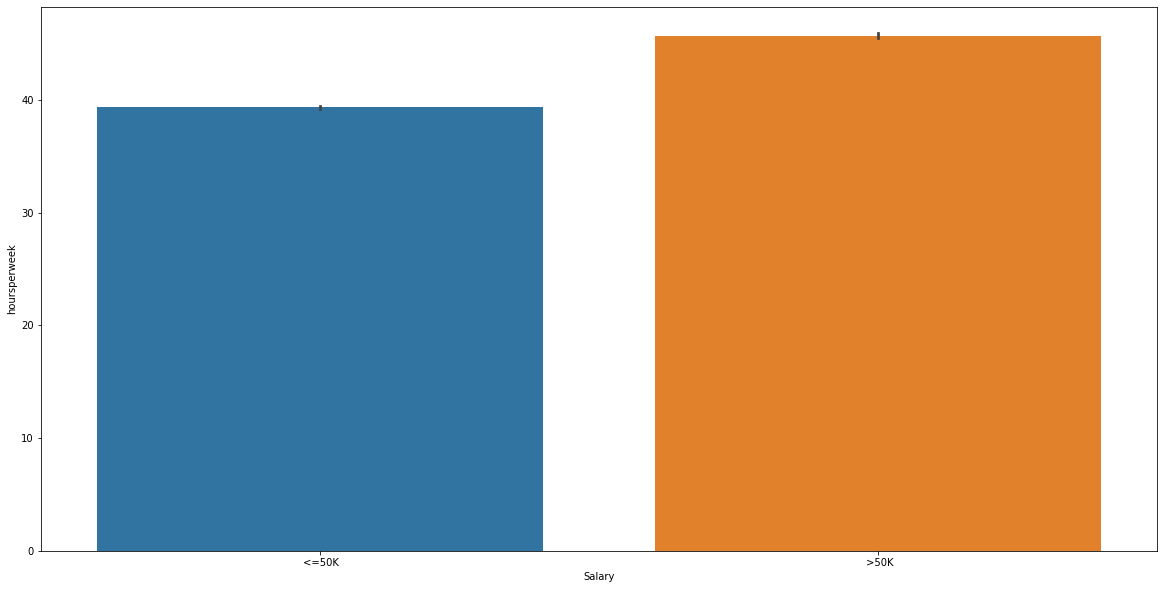

In [19]:
plt.figure(figsize=(20,10))
sns.barplot(x='Salary', y='hoursperweek', data=salary_train)
plt.show()

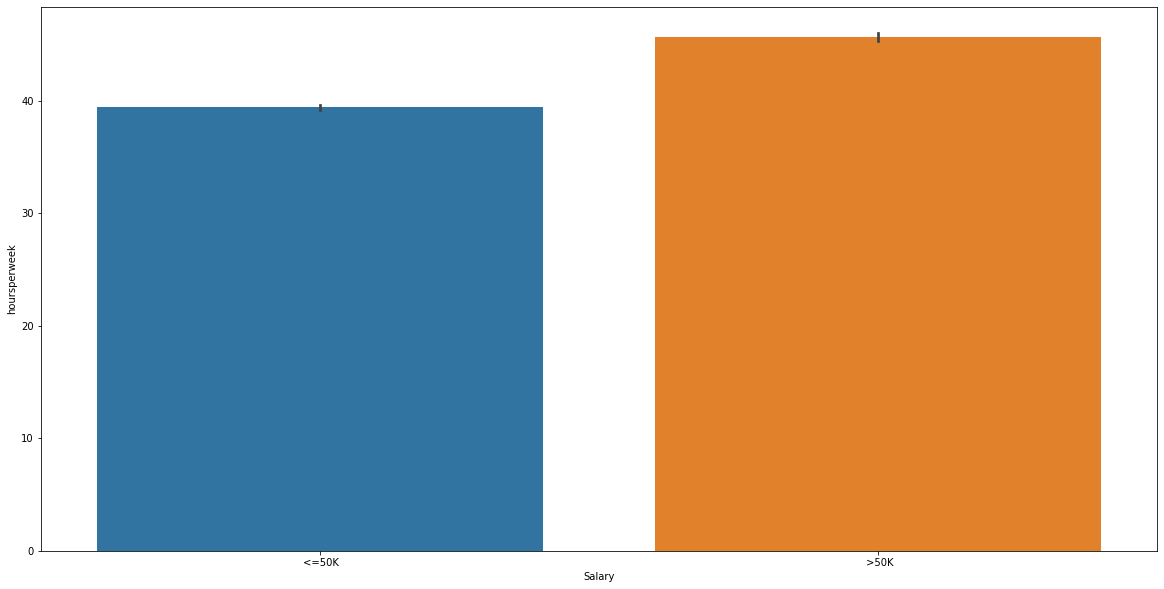

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x='Salary', y='hoursperweek', data=salary_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


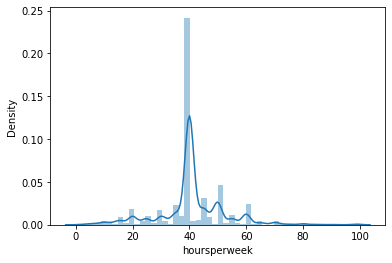

In [21]:
sns.distplot(salary_train['hoursperweek'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


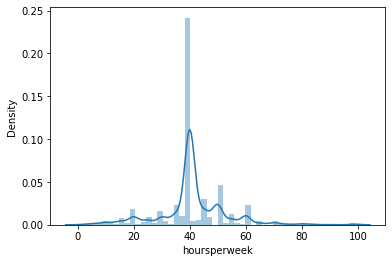

In [22]:
sns.distplot(salary_test['hoursperweek'])

<Figure size 1080x720 with 0 Axes>

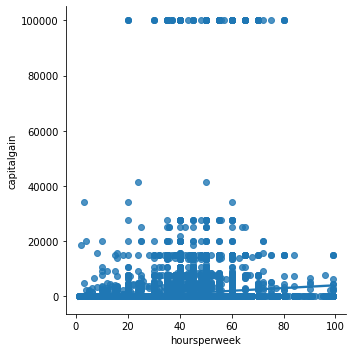

In [23]:
plt.figure(figsize=(15,10))
sns.lmplot(y='capitalgain', x='hoursperweek',data=salary_train)
plt.show()

<Figure size 1080x720 with 0 Axes>

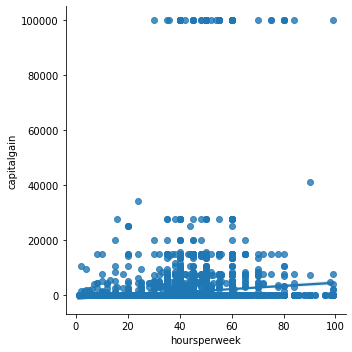

In [24]:
plt.figure(figsize=(15,10))
sns.lmplot(y='capitalgain', x='hoursperweek',data=salary_test)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


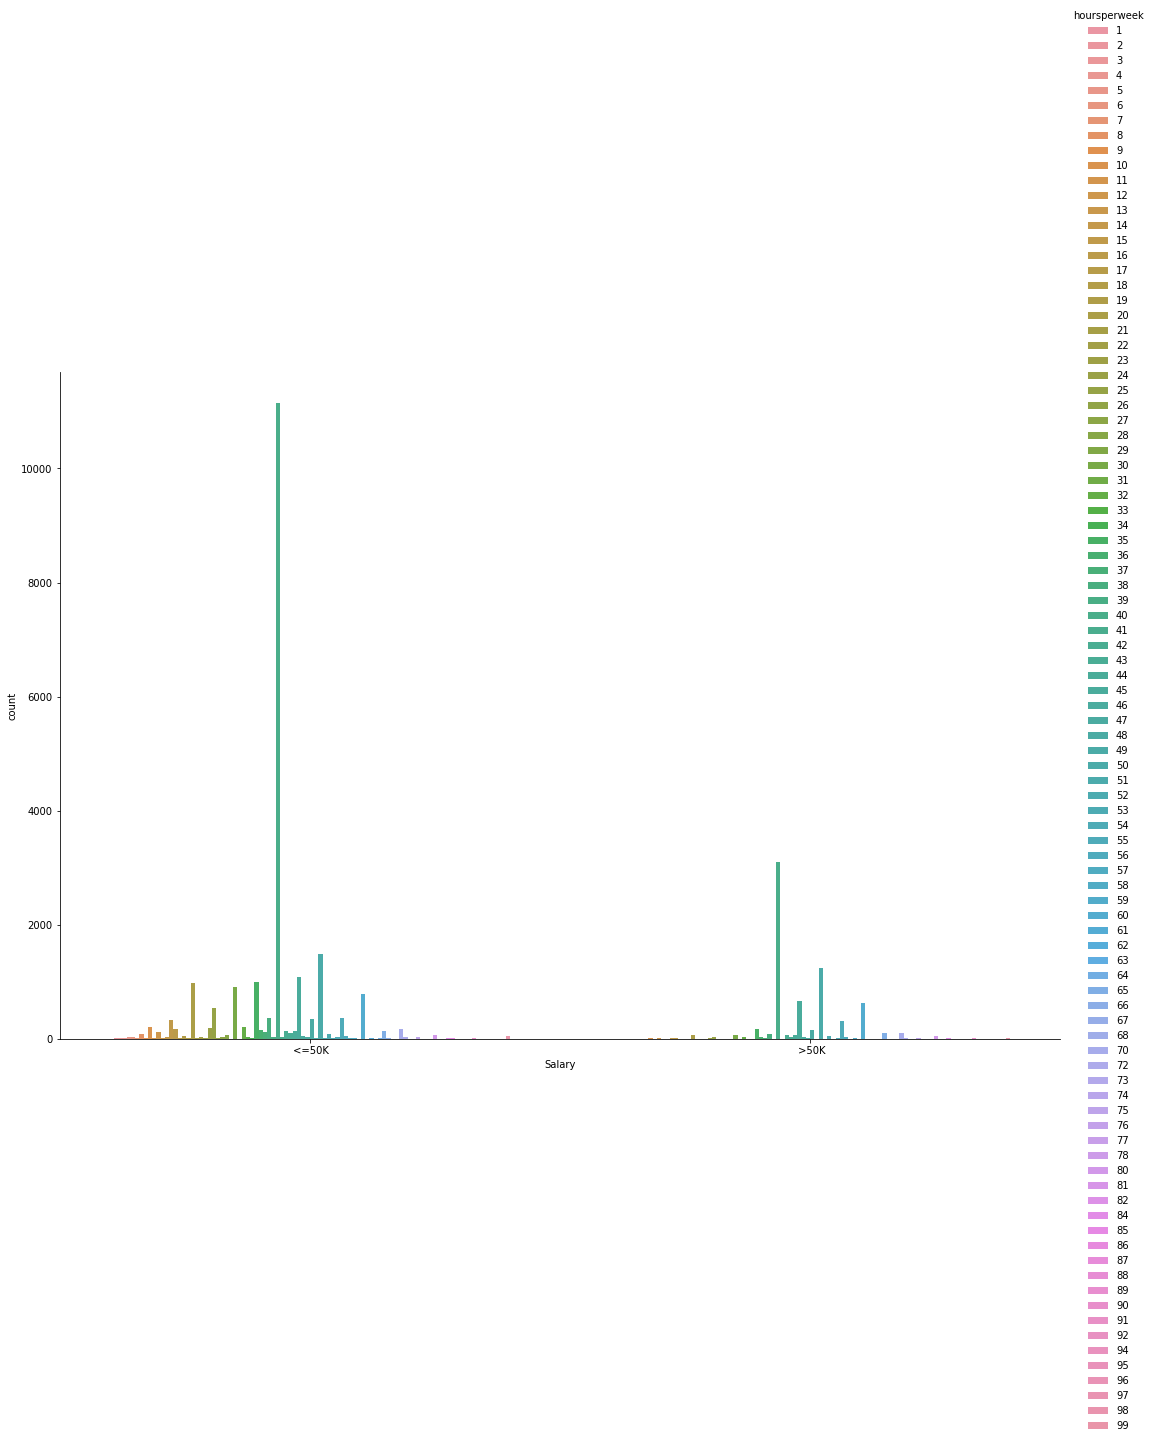

In [25]:
sns.factorplot(x='Salary', hue='hoursperweek', data=salary_train, kind='count', height=10,aspect=1.5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


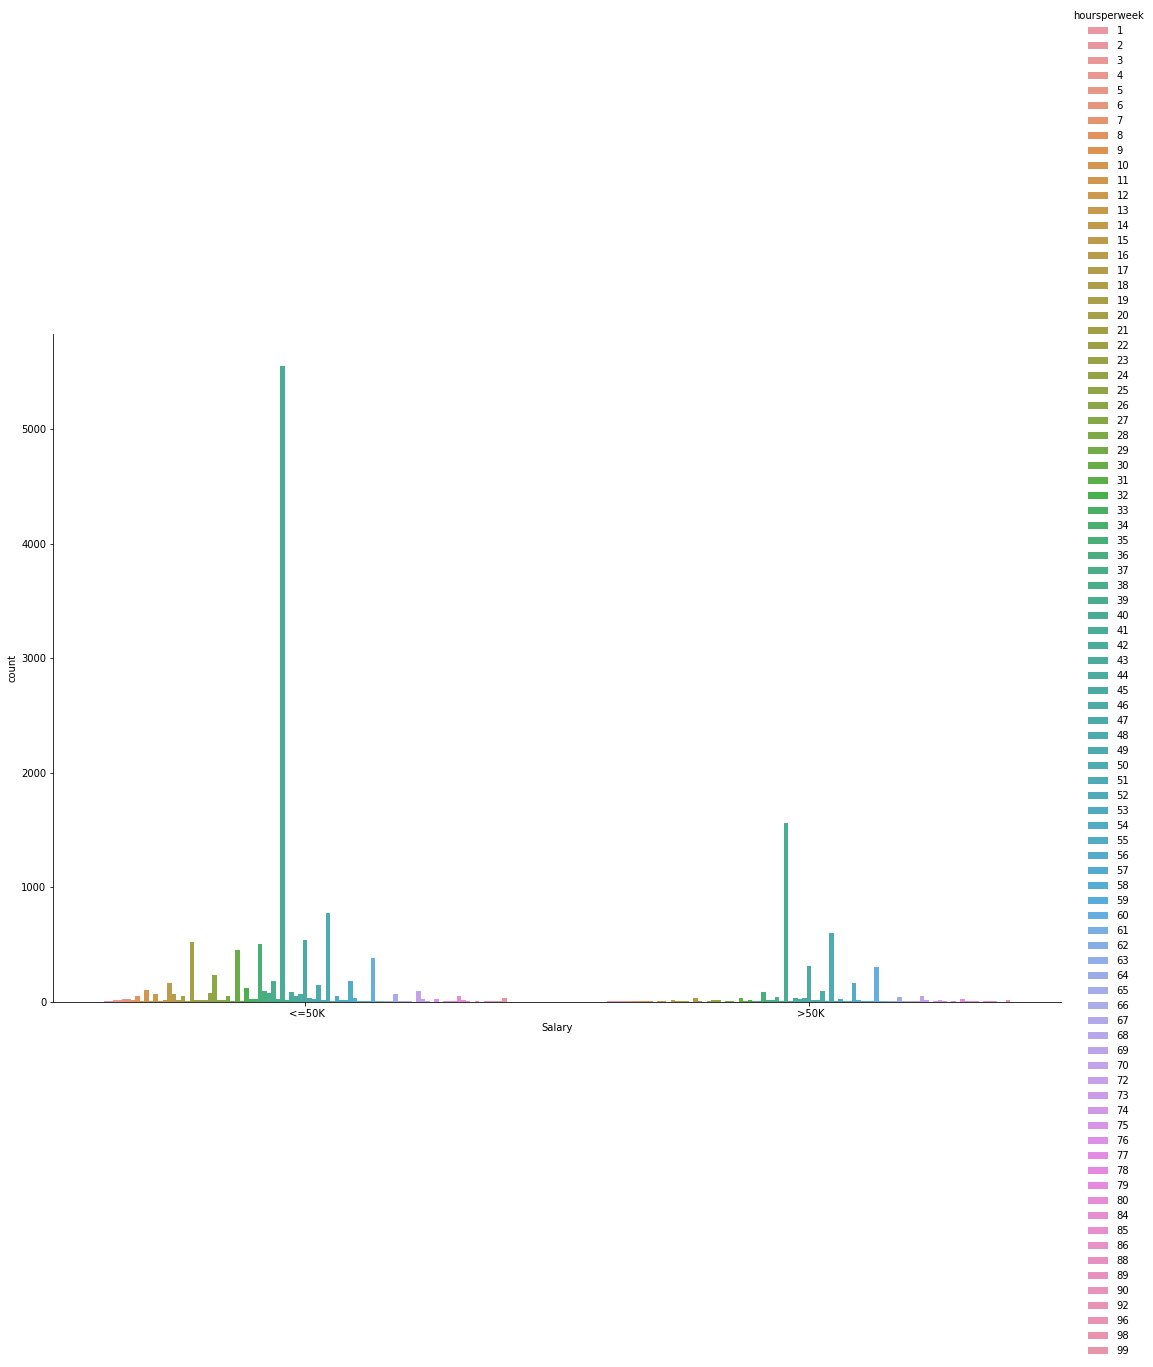

In [26]:
sns.factorplot(x='Salary', hue='hoursperweek', data=salary_test, kind='count', height=10,aspect=1.5)

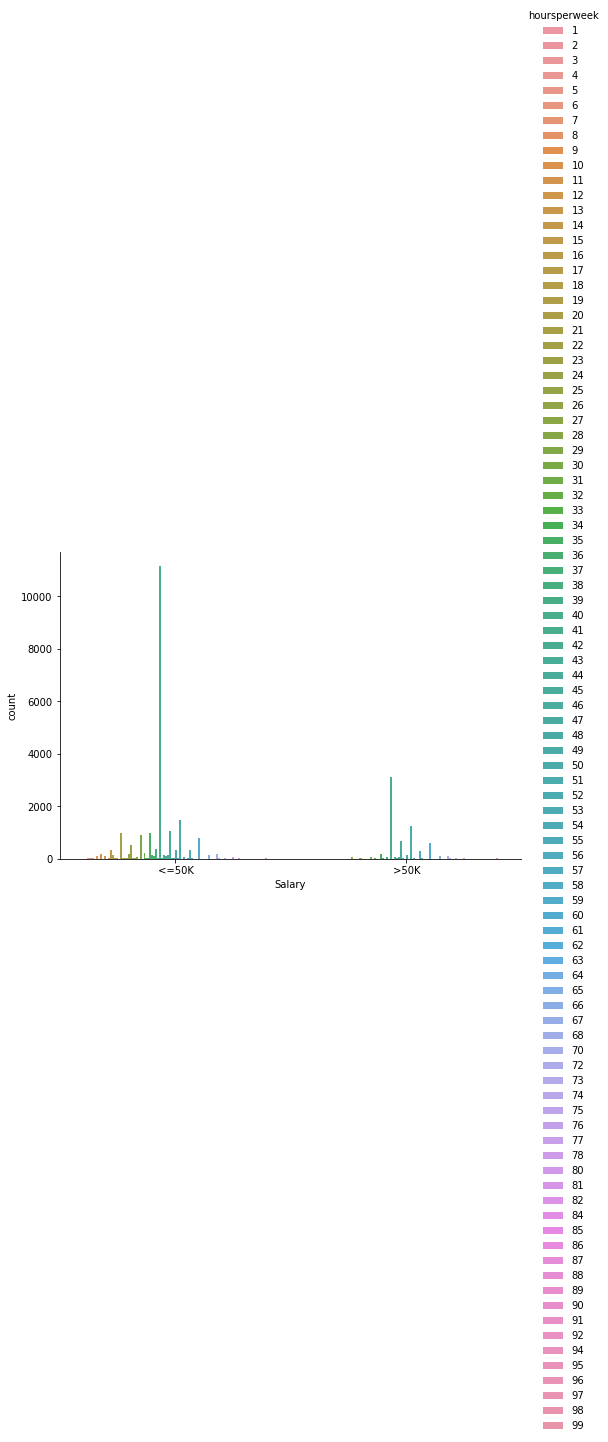

In [27]:
sns.catplot(x='Salary', hue='hoursperweek', data=salary_train, kind='count',aspect=1.5)

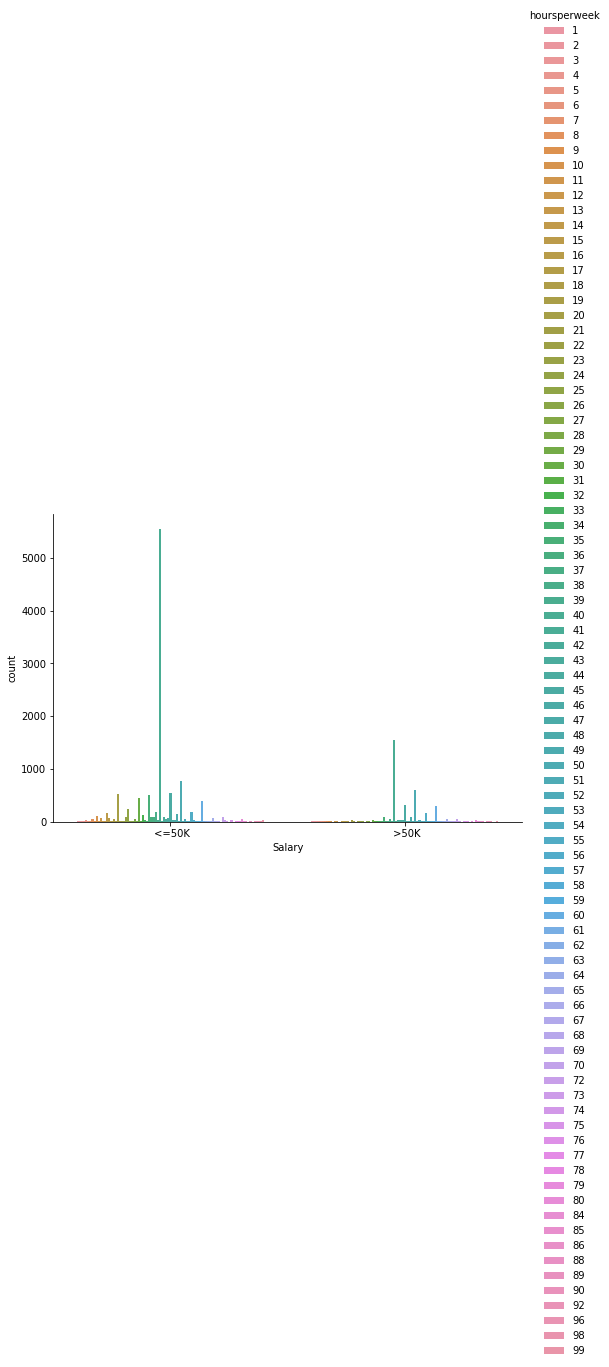

In [28]:
sns.catplot(x='Salary', hue='hoursperweek', data=salary_test, kind='count',aspect=1.5)

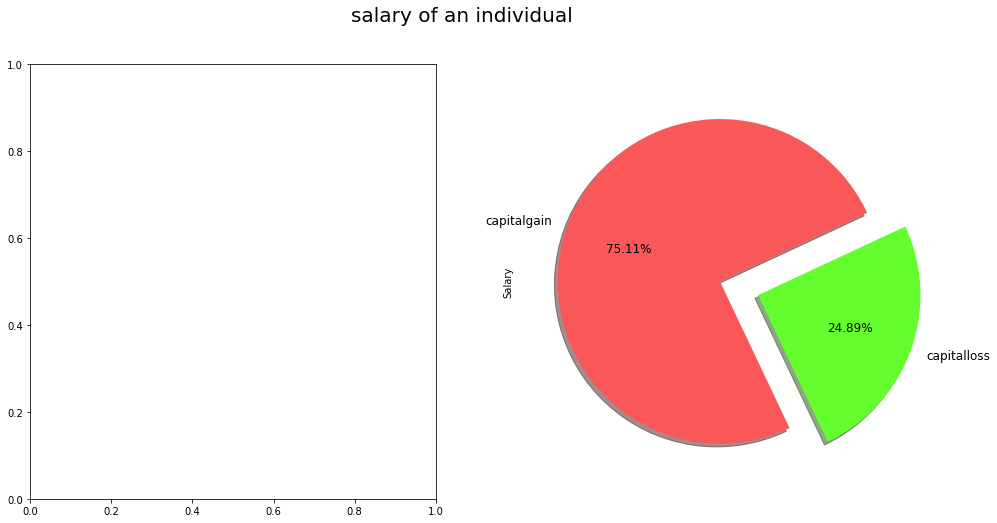

In [29]:
plt.subplots(1,2, figsize=(16,8))
colors = ["#FA5858", "#64FE2E"]
labels ="capitalgain", "capitalloss"
plt.suptitle('salary of an individual', fontsize=20)
salary_train["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

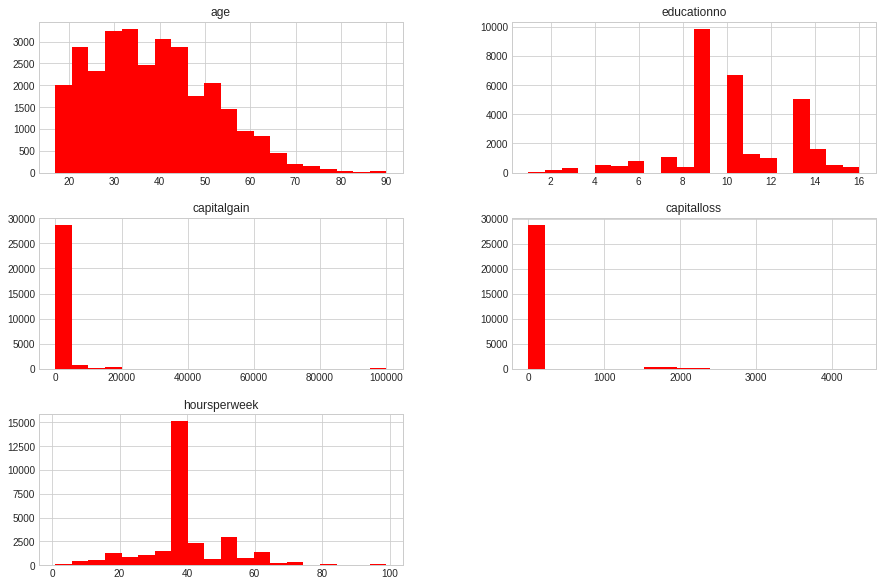

In [30]:
plt.style.use('seaborn-whitegrid')
salary_train.hist(bins=20, figsize=(15,10), color='red')
plt.show()

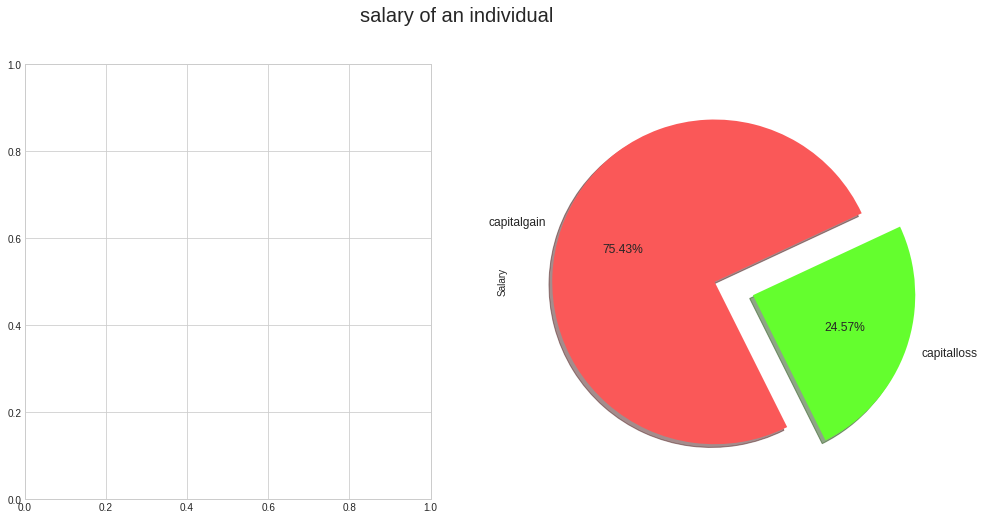

In [31]:
plt.subplots(1,2, figsize=(16,8))
colors = ["#FA5858", "#64FE2E"]
labels ="capitalgain", "capitalloss"
plt.suptitle('salary of an individual', fontsize=20)
salary_test["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)

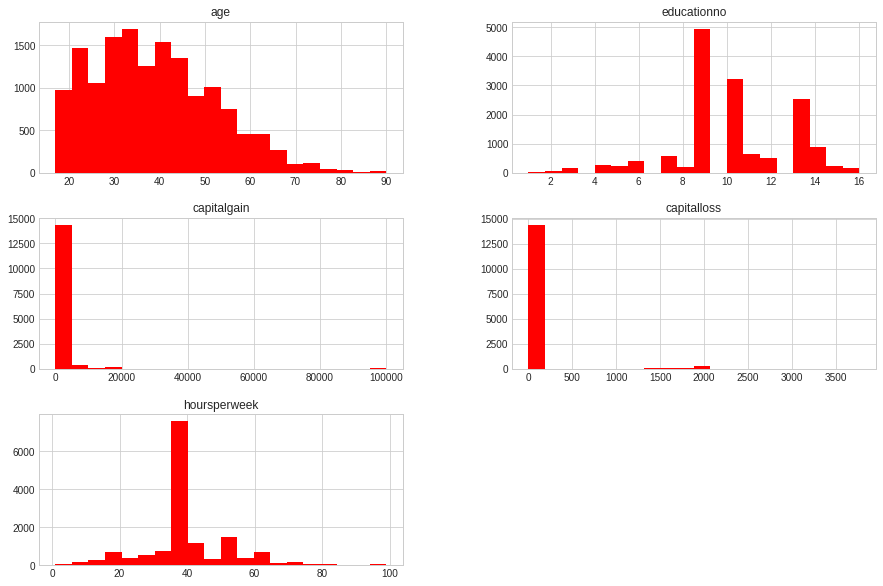

In [32]:
plt.style.use('seaborn-whitegrid')

salary_test.hist(bins=20, figsize=(15,10), color='red')
plt.show()

In [33]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [34]:
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [35]:
col_names=list(salary_train.columns)
col_names

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [36]:
train_X=salary_train[col_names[0:13]]
train_X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [37]:
train_Y=salary_train[col_names[13]]
train_Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [38]:
test_x=salary_test[col_names[0:13]]
test_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [39]:
test_y=salary_test[col_names[13]]
test_y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [40]:
from sklearn.naive_bayes import GaussianNB
Gnbmodel=GaussianNB()

In [41]:
train_pred_gau=Gnbmodel.fit(train_X,train_Y).predict(train_X)
train_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [42]:
test_pred_gau=Gnbmodel.fit(train_X,train_Y).predict(test_x)
test_pred_gau

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [43]:
train_acc_gau=np.mean(train_pred_gau==train_Y)

In [44]:
test_acc_gau=np.mean(test_pred_gau==test_y)

In [45]:
train_acc_gau

0.7953317197705646

In [46]:
test_acc_gau

0.7946879150066402